In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
from necro_uncal_new_updated import model as model100
from necro_uncal_new_10tnf import model as model10
# from necro_uncal_new_1tnf import model as model1
# from necro_uncal_new_01tnf import model as model01
import pandas as pd
# alias_model_components(model100, model10, model1, model01)
from scipy import stats
from pysb.simulator import SimulationResult

In [2]:
print(list(model100.initial_conditions))

[(TNF(brec=None), Parameter('TNF_0', 2326.0)), (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4800.0)), (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None), Parameter('TRADD_0', 4696.0)), (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'), Parameter('RIP1_0', 40000.0)), (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'), Parameter('TRAF_0', 11776.0)), (cIAP(btraf=None), Parameter('cIAP_0', 9000.0)), (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)), (A20(brip=None), Parameter('A20_0', 9000.0)), (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9000.0)), (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)), (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)), (flip_L(bDED=None, state='A'), Parameter('flip_L_0', 3900.0)), (LUBAC(brip=None), Parameter('Lubac_0', 7226.0)), (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 3799.0))]


In [3]:
print(list(model10.initial_conditions))

[(TNF(brec=None), Parameter('TNF_0', 233.0)), (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4800.0)), (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None), Parameter('TRADD_0', 4696.0)), (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'), Parameter('RIP1_0', 40000.0)), (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'), Parameter('TRAF_0', 11776.0)), (cIAP(btraf=None), Parameter('cIAP_0', 9000.0)), (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)), (A20(brip=None), Parameter('A20_0', 9000.0)), (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9000.0)), (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)), (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)), (flip_L(bDED=None, state='A'), Parameter('flip_L_0', 3900.0)), (LUBAC(brip=None), Parameter('Lubac_0', 7226.0)), (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 3799.0))]


In [4]:
par_files = np.load('most_likely_par_5k_necropydream_may62020.npy')
n_pars = len(par_files)
all_pars = np.zeros((n_pars, len(model100.parameters)))

rate_params = model100.parameters_rules() # these are only the parameters involved in the rules
param_values = np.array([p.value for p in model100.parameters]) # these are all the parameters
rate_mask = np.array([p in rate_params for p in model100.parameters])

for i in range(n_pars):
    par = par_files[i]
    param_values[rate_mask] = 10 ** par
    all_pars[i] = param_values
print(len(all_pars))    

5000


In [5]:
par_files = np.load('most_likely_par_5k_necropydream_may62020.npy')
n_pars = len(par_files)
all_pars2 = np.zeros((n_pars, len(model10.parameters)))

rate_params = model10.parameters_rules() # these are only the parameters involved in the rules
param_values = np.array([p.value for p in model10.parameters]) # these are all the parameters
rate_mask = np.array([p in rate_params for p in model10.parameters])

for i in range(n_pars):
    par = par_files[i]
    param_values[rate_mask] = 10 ** par
    all_pars2[i] = param_values
print(len(all_pars2)) 

5000


In [6]:
print('running simulations 100')
# t = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])

tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
result100 = solver100.run(param_values=all_pars, num_processors = 10)
result100.save('test_necro_pydream_5chns_5k_5620_100tnf.h5',include_obs_exprs = True)
df1 = result100.dataframe

2020-05-13 18:44:05.160 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created


running simulations 100


2020-05-13 18:44:05.698 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-13 18:44:05.759 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2020-05-13 18:44:06.172 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2020-05-13 18:45:12.928 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-13 18:45:12.929 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-13 18:45:14.458 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [7]:
print('running simulations 10')
tspan = np.linspace(0, 1440, 300)
solver10 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
result10 = solver10.run(param_values=all_pars2, num_processors = 10)
result10.save('test_necro_pydream_5chns_5k_5620_10tnf.h5',include_obs_exprs = True)
df2 = result10.dataframe

2020-05-13 18:45:30.229 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-13 18:45:30.237 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-13 18:45:30.272 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations 10


2020-05-13 18:45:30.690 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes
2020-05-13 18:46:15.989 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-13 18:46:15.990 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-13 18:46:17.437 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [9]:
br = SimulationResult.load('test_necro_pydream_5chns_5k_5620_100tnf.h5')

In [ ]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([br.dataframe],
               keys=['wt'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue'}
#     ('MLKLa_obs', 'a20ko'): 'orange',
#     ('MLKLa_obs', 'cyldko'): 'red'
# }

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Model Fitting for 100 & 10 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='orange', lw=4),
#                 Line2D([0], [0], color='red', lw=4)]
# plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()

In [ ]:
print('running simulations 10')
tspan = np.linspace(0, 1440, 300)
solver10 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
result10 = solver10.run(param_values=all_pars2, num_processors = 10)
result10.save('necro_pydream_5chns_5k_5620_10tnf.h5')
df2 = result10.dataframe
# df2 = result10.dataframe

In [ ]:
wt100 = SimulationResult.load('necro_pydream_5chns_5k_5620_100tnf.h5')
# df1 = wt100.dataframe

In [ ]:
wt10 = SimulationResult.load('necro_pydream_5chns_5k_5620_10tnf.h5')
# df2 = wt10.dataframe

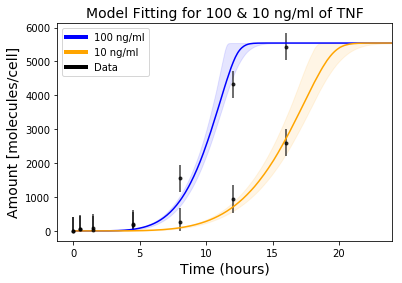

In [12]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([result100.dataframe, result10.dataframe],
               keys=['mlkl100', 'mlkl10'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'mlkl100'): 'blue',
    ('MLKLa_obs', 'mlkl10'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Model Fitting for 100 & 10 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, ['100 ng/ml', '10 ng/ml', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

In [ ]:
tspan = np.linspace(0, 1440, 300)
# x101 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x1001 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y1002 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])
# y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])

plt.figure()
for n in range(len(all_pars)):
    plt.plot(tspan/60, df1.loc[:]['MLKLa_obs'].iloc[:],lw=1.5, color ='green', label ='100 TNF',  zorder = 1, marker ='*', alpha = 0.30)
# plt.scatter(x1001/60, y1002*5544)
    plt.plot(tspan/60, df2.loc[:]['MLKLa_obs'].iloc[:],lw=1.5, color ='blue', label ='10 TNF',  zorder = 1, marker ='*', alpha = 0.30)
# plt.scatter(x101/60, y101*5544)

#     plt.errorbar(x100/60, y100*5544, yerr=210, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.title('pMLKL with 100 ng/ml of TNF', fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# custom_lines = [Line2D([0], [0], color='green', lw=4),
#                 Line2D([0], [0], color='blue', lw=4)]
# plt.legend(custom_lines, ['Flip_wt', 'Flip_ko'], prop={'size': 10}, loc = 'best')
# plt.savefig('pmlkl_100tnf_wdata_pydream_best10kpars_t.png',dpi=300)
# plt.ylim(ymin = -10, ymax =100)
# plt.legend(loc='best')
plt.show()

In [ ]:
plt.figure()
for n in range(25000):
    plt.plot(tspan/60, df1.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='green', label ='Flip_wt',  zorder = 1, marker ='*', alpha = 0.30)
    plt.plot(tspan/60, df5.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', label ='Flip_ko', zorder = 1, marker ='*', alpha = 0.30)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.title('Flip vs Flip KO with 100 ng/ml of TNF', fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]
plt.legend(custom_lines, ['Flip_wt', 'Flip_ko'], prop={'size': 10}, loc = 'best')
# plt.savefig('pmlkl_100tnf_wdata_pydream_best10kpars_t.png',dpi=300)
# plt.ylim(ymin = -10, ymax =100)
# plt.legend(loc='best')
plt.show()

In [ ]:
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 600, 720, 840, 960])
y1002 = np.array([0.2798939020159581, 0.510, .7797294067, 0.95,0.98])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480, 600, 720])
x102 = np.array([840, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,0.088128107774737, 0.17])
y102 = np.array([0.30055140114867, 0.47])
# err = 215,264,304,421,1766,3042,4533,5481,5759

# plt.figure()
# for n in range(10000):
#     plt.plot(tspan/60, df1.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='green',  zorder = 1, marker ='*', alpha = 0.30)
# #     plt.errorbar(x100/60, y100*5544, yerr=210, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
#     plt.errorbar(x1001/60, y1001,
#                  yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#                  (.10,.10,.10,.10)],
#                        fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
#     plt.errorbar(x1002/60, y1002,
#                  yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)

In [ ]:
# x101 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x1001 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y1002 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([wt100.dataframe, wt10.dataframe],
               keys=['mlkl100', 'mlkl10'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'mlkl100'): 'blue',
    ('MLKLa_obs', 'mlkl10'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
# plt.title('wgiubeiod',fontsize=14) # Title
# plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
# plt.xlabel('Time (hours)', fontsize = 14) # X label
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
plt.errorbar(x1001/60, y1001,
             yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
             (.10,.10,.10,.10)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002,
             yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
ax.legend(['pMLKL10', 'pMLKL100'])
# Add axis labels and title
ax.set(xlabel='time (s)', ylabel='Count', title=f'SSA plot for {model10.name}')
# fig.savefig("test.png")
plt.show()

In [14]:
import sys 
sys.path.append('..')
# sys.path.insert(0,'/home/ildefog/pydyno')
import pydyno
print(pydyno.__file__)
from pydyno.discretization.pysb_discretize import PysbDomPath
from pydyno.seqanalysis import SeqAnalysis
from pydyno.visualize_simulations import VisualizeSimulations
from pydyno.visualize_discretization import visualization_path, visualization_seq_paths
%matplotlib inline
import random
import h5py

/home/ildefog/miniconda3/envs/calibration/lib/python3.7/site-packages/pydyno/__init__.py


In [ ]:
get_path_signatures.load('pydyno_signatures_5k_5620_100tnf_s36_d15_om05.h5')

In [ ]:
#11:24am
# random.seed(412873)
dp10 = PysbDomPath(model10,'necro_pydream_5chns_5k_5620_10tnf.h5')
signatures, paths = dp10.get_path_signatures(target='s36', type_analysis='production', 
                                             depth=15, dom_om=0.5)

In [ ]:
signatures.dissimilarity_matrix(n_jobs=1)

In [18]:
dp100 = PysbDomPath(model100,'test_necro_pydream_5chns_5k_5620_100tnf.h5')
signatures100, paths100 = dp100.get_path_signatures(target='s36', type_analysis='production', 
                                             depth=15, dom_om=0.5)

In [19]:
signatures100.dissimilarity_matrix(n_jobs=1)

array([[  0., 550.,  22., ..., 544., 544., 544.],
       [550.,   0., 548., ..., 534., 544., 532.],
       [ 22., 548.,   0., ..., 556., 558., 548.],
       ...,
       [544., 534., 556., ...,   0.,  32.,  50.],
       [544., 544., 558., ...,  32.,   0.,  48.],
       [544., 532., 548., ...,  50.,  48.,   0.]])

In [21]:
signatures100.sequences.head()

,,4.81605339050293,9.63210678100586,14.448160171508789,19.26421356201172,24.08026695251465,28.896320343017578,33.71237564086914,38.52842712402344,43.344482421875,48.1605339050293,...,1396.655517578125,1401.4715576171875,1406.28759765625,1411.1036376953125,1415.919677734375,1420.73583984375,1425.5518798828125,1430.367919921875,1435.1839599609375,1440.0
seq_idx,count,,,,,,,,,,,,,,,,,,,,,
0,1,3,3,3,3,3,3,3,3,3,3,...,15,15,15,15,15,15,15,15,15,15
1,1,15,15,15,15,15,15,15,15,15,15,...,8,15,15,8,8,15,8,8,15,0
2,1,3,3,3,3,3,3,3,3,3,3,...,15,15,15,15,15,15,15,15,15,15
3,1,15,15,15,15,15,15,15,15,15,15,...,0,15,15,15,8,8,8,15,15,8
4,1,8,8,8,8,8,8,8,8,8,8,...,15,15,15,22,22,22,22,22,22,22


In [ ]:
signatures100.save('pydyno_signatures_5k_5620_100tnf_s36_d15_om05.h5')

In [22]:
signatures100.silhouette_score_spectral_range(range(2,20), n_jobs=1)

,num_clusters,cluster_silhouette
0,2,0.553688
1,3,0.743146
2,4,0.634219
3,5,0.385758
4,6,0.277507
5,7,0.270261
6,8,0.289359
7,9,0.257607
8,10,0.267016
9,11,0.248494


In [1]:
signatures100.spectral_clustering(4)

NameError: name 'signatures100' is not defined

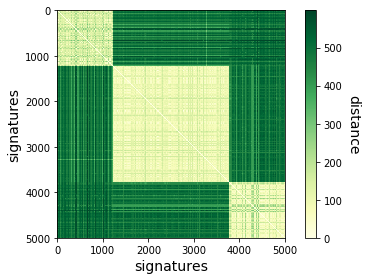

In [26]:
sorted_label_idxs = np.argsort(signatures100.labels)
sorted_diss = signatures100.diss[sorted_label_idxs, :]
sorted_diss = sorted_diss[:, sorted_label_idxs]
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
#     ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im, cbar = heatmap(sorted_diss, range(5000), range(5000), ax=ax,
                   cmap="YlGn", cbarlabel="distance")
ax.figure.axes[-1].yaxis.label.set_size(14)
plt.xlabel('signatures', fontsize = 14)
plt.ylabel('signatures', fontsize = 14)
fig.tight_layout()
plt.savefig('heatmap_clusters_necro_pydream_5chns_5k_5620_100tnf.pdf')
plt.show()

<Figure size 1440x720 with 0 Axes>

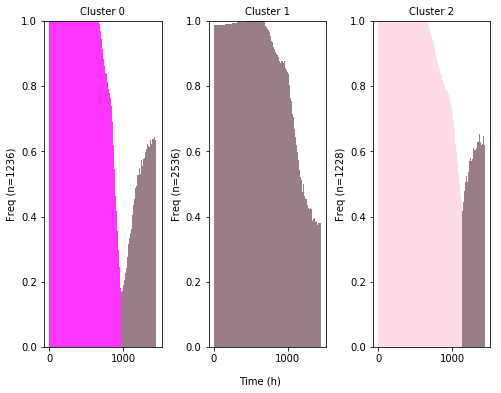

In [27]:
plt.figure(figsize = (20,10))
signatures100.plot_sequences(type_fig='modal')
plt.show()

In [28]:
vt = VisualizeSimulations(model100, sim_results='test_necro_pydream_5chns_5k_5620_100tnf.h5', 
                          clusters=signatures100.labels)

In [ ]:
vt.plot_cluster_dynamics(components=[36])

In [ ]:
pmlkl = model100.monomers['MLKL']
vt.plot_pattern_sps_distribution(pattern=pmlkl(state='active'), type_fig='bar')
plt.show()

In [31]:
cluster_label_idxs = VisualizeSimulations.check_clusters_arg(signatures100.labels, nsims=5000)

In [32]:
pars_cluster_0 = result100.param_values[cluster_label_idxs[0]]
print(len(pars_cluster_0))

1236


In [38]:
np.save('necro_pars_cluster0_5620.npy', pars_cluster_0)

1236


In [39]:
rep_signatures=signatures100.seq_representativeness(method='centrality', clus_labels=signatures100.labels)

In [40]:
print(rep_signatures[0])

((2321, 1), array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3, 19, 19, 19, 19, 19,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6

In [ ]:
from pydyno.visualize_discretization import visualization_seq_paths
visualization_seq_paths(result100, 2321, signatures100)

In [44]:
visualization_path(model100, paths100[3], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path3_5k_5620.png')
visualization_path(model100, paths100[19], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path19_5k_5620.png')
visualization_path(model100, paths100[6], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path6_5k_5620.png')
visualization_path(model100, paths100[15], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path15_5k_5620.png')
visualization_path(model100, paths100[8], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path8_5k_5620.png')

In [ ]:
print('running simulations 100')
tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
simclus0 = solver100.run(param_values=pars_cluster_0, num_processors = 10)
simclus0.save('pydyno_s36prod_5k_5620_100tnf_cluster0pars.h5')
# df2 = result10.dataframe
# df2 = result10.dataframe

In [ ]:
print('running simulations 100')
tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
simclus1 = solver100.run(param_values=pars_cluster_1, num_processors = 10)
simclus1.save('pydyno_s36prod_5k_5620_100tnf_cluster1pars.h5')
# df2 = result10.dataframe
# df2 = result10.dataframe

In [ ]:
print('running simulations 100')
tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
simclus2 = solver100.run(param_values=pars_cluster_2, num_processors = 10)
simclus2.save('pydyno_s36prod_5k_5620_100tnf_cluster2pars.h5')
# df2 = result10.dataframe
# df2 = result10.dataframe

In [ ]:
#FOR PLOTTING PERCENTILES 
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([simclus1.dataframe],
               keys=['cluster2'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'cluster2'): 'blue'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Cluster 1 Dynamics for 100 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
fig.savefig("pydyno_s36prod_5k_5620_100tnf_cluster2pars_wdata.pdf")
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, ['cluster2', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

In [ ]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([simclus0.dataframe, simclus1.dataframe, simclus2.dataframe],
               keys=['cluster0', 'cluster1', 'cluster2'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'cluster0'): 'blue',
    ('MLKLa_obs', 'cluster1'): 'green',
    ('MLKLa_obs', 'cluster2'): 'red'
}

lower_quantile = 0.0  # 10%
upper_quantile = 1.0  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, marker='*')
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Cluster Dynamics for 100 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')

plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, ['cluster0', 'cluster1', 'cluster2', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

In [ ]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([simclus0.dataframe],
               keys=['mlkl100'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'mlkl100'): 'blue'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Cluster 0 Dynamics for 100 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
fig.savefig("pydyno_s36prod_5k_5620_100tnf_cluster0pars_wodata.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# # plt.errorbar(x101/60, y101*5544,
# #              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
# #                     0.050022163974868*5544),
# #              (400,400,400,400,400)],
# #                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# # plt.errorbar(x102/60, y102*5544,
# #              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='black', lw=4)]
# plt.legend(custom_lines, ['100 ng/ml', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

In [33]:
pars_cluster_1 = result100.param_values[cluster_label_idxs[1]]
print(len(pars_cluster_1))

2536


In [51]:
np.save('necro_pars_cluster1_5620.npy', pars_cluster_1)

In [41]:
print(rep_signatures[1])

((2698, 1), array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15

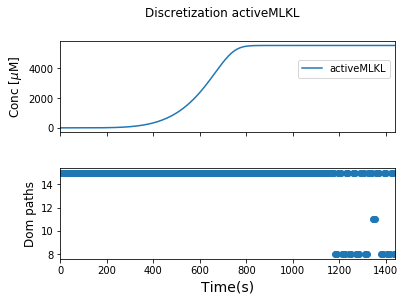

In [42]:
visualization_seq_paths(result100, 2698, signatures100)

In [45]:
visualization_path(model100, paths100[15], type_analysis='production', 
                   filename='cluster1100tnf_arrestin_s36_prod_05om_depth15_path15_5k_5620.png')
visualization_path(model100, paths100[11], type_analysis='production', 
                   filename='cluster1100tnf_arrestin_s36_prod_05om_depth15_path11_5k_5620.png')
visualization_path(model100, paths100[8], type_analysis='production', 
                   filename='cluster1100tnf_arrestin_s36_prod_05om_depth15_path8_5k_5620.png')

In [34]:
pars_cluster_2 = result100.param_values[cluster_label_idxs[2]]
print(len(pars_cluster_2))

1228


In [52]:
np.save('necro_pars_cluster2_5620.npy', pars_cluster_2)

In [47]:
from pydyno.visualize_discretization import visualization_path

In [48]:
print(rep_signatures[2])

((2764, 1), array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8

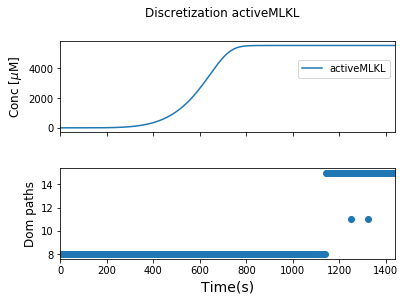

In [49]:
visualization_seq_paths(result100, 2764, signatures100)

In [50]:
visualization_path(model100, paths100[8], type_analysis='production', 
                   filename='cluster2100tnf_arrestin_s36_prod_05om_depth15_path8_5k_5620.png')
visualization_path(model100, paths100[15], type_analysis='production', 
                   filename='cluster2100tnf_arrestin_s36_prod_05om_depth15_path15_5k_5620.png')
visualization_path(model100, paths100[11], type_analysis='production', 
                   filename='cluster2100tnf_arrestin_s36_prod_05om_depth15_path11_5k_5620.png')

In [ ]:
m = model100.components 

In [ ]:
a20ko = [0]

print('running simulations 100')
tspan = np.linspace(0, 1440, 300)
solver100n = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
simclus2n = solver100n.run(initials = {m.A20(brip = None):a20ko},
                         param_values=pars_cluster_0, num_processors = 10)
# simclus2.save('pydyno_s36prod_5k_5620_100tnf_cluster0pars_a20ko.h5')
# df2 = result10.dataframe
# df2 = result10.dataframe

In [ ]:
cyldko = [0]

print('running simulations 100')
tspan = np.linspace(0, 1440, 300)
solver100nnn = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
simclus2nnn = solver100nnn.run(initials = {m.CYLD(brip=None, btraf = None):cyldko},
                         param_values=pars_cluster_0, num_processors = 10)
simclus2nnn.save('BLAH.h5')
# df2 = result10.dataframe
# df2 = result10.dataframe

In [ ]:
sim1 = SimulationResult.load('necro_pydream_5chns_5k_5620_100tnf.h5')
wt = sim1.dataframe
# a20ko = SimulationResult.load('pydyno_s36prod_5k_5620_100tnf_cluster0pars_a20ko.h5').dataframe
# cyldko = SimulationResult.load('pydyno_s36prod_5k_5620_100tnf_cluster0pars_cyldko.h5').dataframe

In [ ]:
wt['MLKLa_obs'][:]

In [ ]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([sim1.dataframe],
               keys=['wt'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue'}
#     ('MLKLa_obs', 'a20ko'): 'orange',
#     ('MLKLa_obs', 'cyldko'): 'red'
# }

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Model Fitting for 100 & 10 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='orange', lw=4),
#                 Line2D([0], [0], color='red', lw=4)]
# plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()

In [ ]:
a20ko = [0]
print('running simulations 100')
tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
simclus2 = solver100.run(initials = {model100.components.A20(brip = None):a20ko},
                         param_values=pars_cluster_0, num_processors = 10)
simclus2.save('pydyno_s36prod_5k_5620_100tnf_cluster0pars_a20ko.h5')
# df2 = result10.dataframe
# df2 = result10.dataframe

In [ ]:
print('running simulations 100')
# t = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
tspan = np.linspace(0, 1440, 300)
solver100n = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
result100n = solver100n.run(param_values=all_pars, num_processors = 10)
result100n.save('necro_pydream_5chns_5k_5620_100tnf_test.h5')
# df = result100.dataframe
# result10.save('necro_pydream_5chns_929_10tnf_updated_kocyld.h5')
# df1 = result100.dataframe

In [ ]:
from pysb.core import ComponentSet, Model
from pysb.simulator import SimulationResult
import weakref
from contextlib import contextmanager

def _model_setstate_monkey_patch(self, state):
    """Monkey patch for Model.__setstate__ for restoring from older pickles"""

    # restore the 'model' weakrefs on all components
    self.__dict__.update(state)
    # Set "tags" attribute for older, pickled models
    self.__dict__.setdefault('tags', ComponentSet())
    for c in self.all_components():
        c.model = weakref.ref(self)

@contextmanager
def _patch_model_setstate():
    old_setstate = Model.__setstate__
    Model.__setstate__ = _model_setstate_monkey_patch
    try:
        yield
    finally:
        Model.__setstate__ = old_setstate

def simulation_result_load(filename, dataset_name=None, group_name=None):
    with _patch_model_setstate():
        return SimulationResult.load(filename, dataset_name, group_name)

In [ ]:
simnn = simulation_result_load('necro_pydream_5chns_5k_5620_100tnf_test.h5')

In [ ]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([simnn.dataframe],
               keys=['wt'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue'}
#     ('MLKLa_obs', 'a20ko'): 'orange',
#     ('MLKLa_obs', 'cyldko'): 'red'
# }

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Model Fitting for 100 & 10 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='orange', lw=4),
#                 Line2D([0], [0], color='red', lw=4)]
# plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()

In [ ]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([result100n.dataframe, simclus2n.dataframe, simclus2nn.dataframe],
               keys=['wt', 'a20ko', 'cyldko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'a20ko'): 'orange',
    ('MLKLa_obs', 'cyldko'): 'red'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Model Fitting for 100 & 10 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='orange', lw=4),
#                 Line2D([0], [0], color='red', lw=4)]
# plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()